# <span style="color:darkblue"> Lecture 16 - Time Data </span>

<font size = "5">

In  the last lecture we ...
- Completed the module on SQL
- Learned about escape characters


In  this lecture we will ...

- Process time data in Python
- Learn about wildcards

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs
# "maplotlib.dates" has advanced options for plotting dates
# "datetime" handles date information

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

Import data

In [2]:
financial = pd.read_csv("data_raw/financial.csv")

<font size = "5">

"Parse" time columns

In [3]:
# Convert string column to datetime format
# If the date format is simple, you can also parse on input as
# financial = pd.read_csv("data_raw/financial.csv",parse_dates = ["date"]
# See advanced options for parsing further in the lecture...

financial["date"] = pd.to_datetime(financial["date_str"])

<font size = "5">

Check Types

In [4]:
# Standard data types are "int", "str", "float", and "bool"
# There is also a "datetime" types

financial.dtypes

date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "5">

Visualize time data

In [5]:
financial['date'][0]

Timestamp('2018-04-04 00:00:00')

In [6]:
financial.sort_values("date",ascending = False)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
1304,4/4/2023,4100.60,33402.38,April 04 2023,"Tuesday, 2023-04-04",4-Apr-23,2023-04-04
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29
...,...,...,...,...,...,...,...
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05


Text(0.5, 1.0, 'The evolution of the stock market')

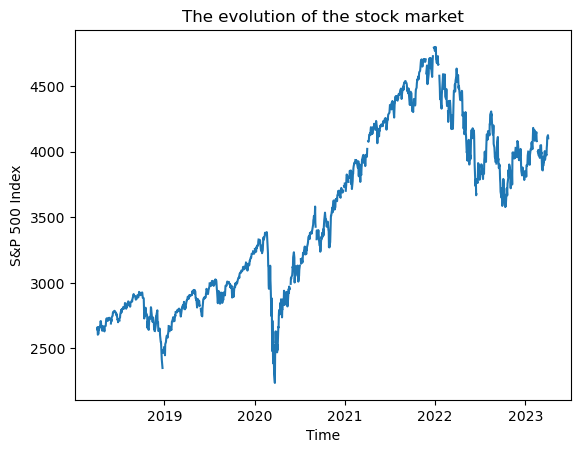

In [7]:
# plt.plot() is used to create line plots
# The first two arguments are column names for the (x,y) data
# The third argument is the data
# Make sure that the data is sorted, since the lines will be connected
# based on the order of the dataset

plt.plot("date", "sp500",
          data = financial)
plt.xlabel("Time")
plt.ylabel("S&P 500 Index")
plt.title("The evolution of the stock market")


<font size = "5">

S&P 500 tracks the average performance of <br>
of the largest companies in the US stock market

$\quad$ https://en.wikipedia.org/wiki/S%26P_500 <br>
$\quad$ https://fred.stlouisfed.org/series/SP500

<font size = "5">

Try it yourself!

- Generate a line plot which has the Dow Jones <br>
Industrial Index ("djia") on the y-axis and <br>
"date" on the x-axis.

Text(0.5, 1.0, 'The evolution of the stock market')

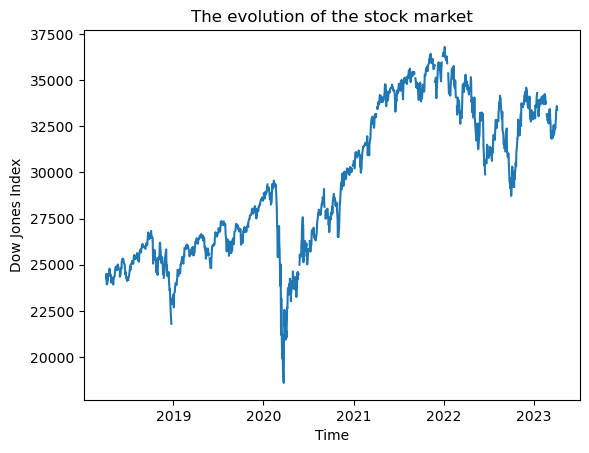

In [9]:
# Write your own code

plt.plot("date", "djia",
          data = financial)
plt.xlabel("Time")
plt.ylabel("Dow Jones Index")
plt.title("The evolution of the stock market")



# <span style="color:darkblue"> II. Dates + Wild Cards  </span>

<font size = "5">

Convert to string (a)


- A wildcard ```%``` is used to denote date formats
- Useful when working with text data

$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

In [7]:
# "String from time" .dt.strftime()
# The first argument needs to be a datetime type 
# The second argument is the format you want to use
# Note: "dt" stands for datatime

financial["month_str"] = financial["date"].dt.strftime("%m")
financial["week_str"]  = financial["date"].dt.strftime("%W")


<font size = "5">

Convert to string (b)

$\quad$ <img src="figures/wildcards_fig2.png" alt="drawing" width="400"/>

In [8]:
financial["monthname"]   =  financial["date"].dt.strftime("%B")
financial["weekdayname"] =  financial["date"].dt.strftime("%A")

financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,monthname,weekdayname
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wednesday
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thursday
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Friday
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Monday
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wednesday
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thursday
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Friday
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Monday


<font size = "5">

Personalized format

In [18]:
# Insert wildcards inside custom strings
# Internally it will "fill-in-the-blank" with the corresponding information
# You can use commas, dashes (--), slash (/) or other characters

message_monthname =  financial["date"].dt.strftime("This is the month of %B")

message_monthday  =  financial["date"].dt.strftime("The day of the week is %A")

message_yearmonth =  financial["date"].dt.strftime("%Y-%m")


print(message_monthname)
print(message_monthday)
print(message_yearmonth)


0       This is the month of April
1       This is the month of April
2       This is the month of April
3       This is the month of April
4       This is the month of April
                   ...            
1300    This is the month of March
1301    This is the month of March
1302    This is the month of March
1303    This is the month of April
1304    This is the month of April
Name: date, Length: 1305, dtype: object
0       The day of the week is Wednesday
1        The day of the week is Thursday
2          The day of the week is Friday
3          The day of the week is Monday
4         The day of the week is Tuesday
                      ...               
1300    The day of the week is Wednesday
1301     The day of the week is Thursday
1302       The day of the week is Friday
1303       The day of the week is Monday
1304      The day of the week is Tuesday
Name: date, Length: 1305, dtype: object
0       2018-04
1       2018-04
2       2018-04
3       2018-04
4       2018-04
    

<font size = "5">

Try it yourself!

- Create a new column called "date_test" <br>
  which has the format using ```.dt.strftime()```
  
$\quad$ ```Monday, December 31, 2023 ```

In [9]:
# Write your own code

date_test = financial["date"].dt.strftime("%A, %B %d, %Y")

date_test


0       Wednesday, April 04, 2018
1        Thursday, April 05, 2018
2          Friday, April 06, 2018
3          Monday, April 09, 2018
4         Tuesday, April 10, 2018
                  ...            
1300    Wednesday, March 29, 2023
1301     Thursday, March 30, 2023
1302       Friday, March 31, 2023
1303       Monday, April 03, 2023
1304      Tuesday, April 04, 2023
Name: date, Length: 1305, dtype: object

# <span style="color:darkblue"> III. Data Operations </span>

<font size = "5">

Parsing + wild cards

$\quad$ <img src="figures/wildcards_fig3.png" alt="drawing" width="400"/>

In [13]:
# Combine wildcards + characters depending on the input
# Can include spaces, commas, "/", "-" or any other formatting
# Be careful to include the wildcar letters in upper or lower case 
# depending on the intended format 

financial['date_ex1_dt'] = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
financial['date_ex2_dt'] = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")

financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,monthname,weekdayname,date_ex1_dt,date_ex2_dt
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,April,Wednesday,2018-04-04,2018-04-04
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,April,Thursday,2018-04-05,2018-04-05
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,April,Friday,2018-04-06,2018-04-06
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,April,Monday,2018-04-09,2018-04-09
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,April,Tuesday,2018-04-10,2018-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,March,Wednesday,2023-03-29,2023-03-29
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,March,Thursday,2023-03-30,2023-03-30
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,March,Friday,2023-03-31,2023-03-31
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,April,Monday,2023-04-03,2023-04-03


**Does the following line of code work?** ```pd.to_datetime(financial["date_ex1"], format = "%A, %Y-%m-%d")```

<font size = "5">

Period grouping

In [14]:
# In "freq" specify the letter for the level of aggregation
# year (y), month (m), week (w), day(d)
# There are also more advanced options! See documentation

month_config = pd.Grouper(key='date', freq='y')

/var/folders/1y/354c1ykj6x7cngpndzcd_kpm0000gn/T/ipykernel_61345/90854863.py:5: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  month_config = pd.Grouper(key='date', freq='y')


<font size = "5">

Aggregate by period

In [15]:
financial.groupby(month_config).agg(sp500_mean = ("sp500","mean")).reset_index()

,date,sp500_mean
0,2018-12-31,2751.921862
1,2019-12-31,2913.360556
2,2020-12-31,3217.856482
3,2021-12-31,4273.406627
4,2022-12-31,4098.514741
5,2023-12-31,4003.579844


In [ ]:
# Group on the period column
# We use a wrapper () to split the command into multiple lines
# The ".reset_index()" option ensures that the grouper is
# converted to a column. This is important for plotting.
# There's a lot of options to 

monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())

In [31]:
monthlydata

,date,sp500_mean
0,2018-12-31,2751.921862
1,2019-12-31,2913.360556
2,2020-12-31,3217.856482
3,2021-12-31,4273.406627
4,2022-12-31,4098.514741
5,2023-12-31,4003.579844


<font size = "5">

Plot aggregate data

Text(0.5, 1.0, 'Monthly average stock market performance')

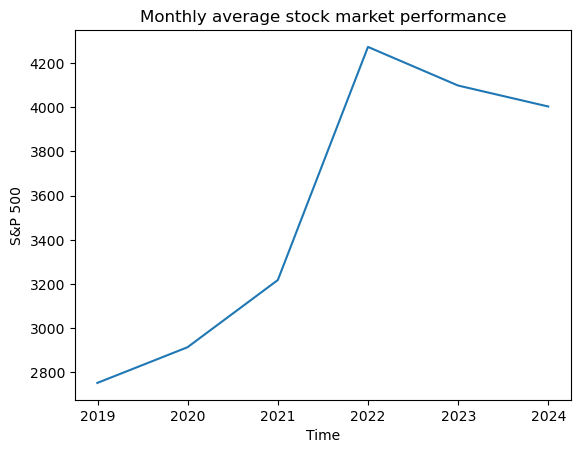

In [32]:
plt.plot("date","sp500_mean",
          data = monthlydata)
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Monthly average stock market performance")

<font size = "5">

Try it yourself!

- Practice ```pd.to_datetime()```
- Parse the column "data_ex3"
- Take a close look at the formatting

HINT: Refer to the table of wildcards <br>
 in the previous section


# Write your own code

financial["date_ex3_dt"] = pd.to_datetime(financial["date_ex3"], format = "%d-%b-%y")
financial

<font size = "5">



<font size = "5">

Try it yourself!

- Compute an aggregate dataset which computes the standard <br>
deviation of the S&P 500 at the weekly level.
- Generate a line plot with your results


/var/folders/1y/354c1ykj6x7cngpndzcd_kpm0000gn/T/ipykernel_61345/1399047709.py:5: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  week_config = pd.Grouper(key='date', freq='w')


,date,sp500_sd
0,2018-04-08,29.872305
1,2018-04-15,20.246041
2,2018-04-22,17.033965
3,2018-04-29,17.694402
4,2018-05-06,13.747390
...,...,...
257,2023-03-12,72.372058
258,2023-03-19,38.469249
259,2023-03-26,25.800050
260,2023-04-02,56.780195


Text(0.5, 1.0, 'Weekly Standard Deviation of the S&P 500')

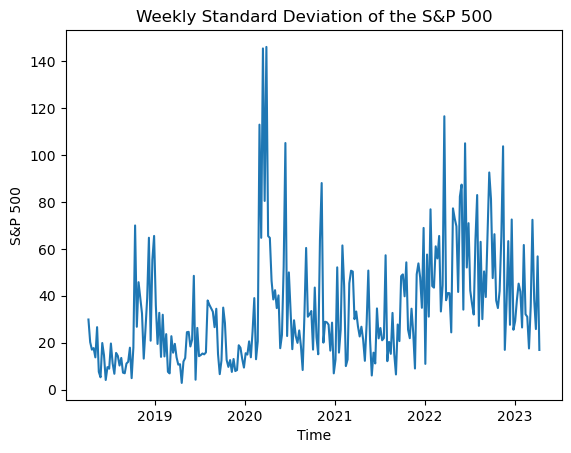

In [22]:
# Write your own code

financial

week_config = pd.Grouper(key='date', freq='w')

weekly_sp500_sd = (financial
         .groupby(week_config)
         .agg(sp500_sd = ("sp500","std"))
         .reset_index())
display(weekly_sp500_sd)

plt.plot("date","sp500_sd",
          data = weekly_sp500_sd)
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly Standard Deviation of the S&P 500")

# <span style="color:darkblue"> IV. Additional Material </span>

<font size = "5">

Full list of wild cards:

- More fine-grained, e.g. microseconds, etc.
- Other formats, e.g. time zone, "AM/PM", etc.

https://www.w3schools.com/python/python_datetime.asp